# Import libraries

In [1]:
# uncomment to install libraries
# ! pip install numpy pandas matplotlib seaborn nltk sklearn regex
# ! python -m spacy download en_core_web_sm
# nltk.download("stopwords")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn
import re

# English stop words
english_stop_words = nltk.corpus.stopwords.words("english")

# Seaborn look

In [18]:
sns.set(context = "notebook", style = "darkgrid", palette = "colorblind", font = "sans-serif")

# Define functions

## Text processing
* Special characters
* Lower case
* White space
* Tokenize with WordPunctTokenizer
* Remove English stop words
Source: [Traditional Methods for Text Data by Dipanjan (DJ) Sarkar
](https://towardsdatascience.com/understanding-feature-engineering-part-3-traditional-methods-for-text-data-f6f7d70acd41)

In [12]:
# process a single document's text
def process_document(document):
    # remove special characters
    document_processed = re.sub(pattern = "[^a-zA-Z0-9_\s]", repl = "", string = document, flags = re.IGNORECASE|re.ASCII)
    
    # lower case
    document_processed = document_processed.lower()
    
    # remove white space
    document_processed = document_processed.strip()
    
    # tokenize document
    tokens = nltk.WordPunctTokenizer().tokenize(document_processed)
    
    # filter stopwords out of document
    tokens_no_stop_words = [token for token in tokens if token not in english_stop_words and len(token) > 2]
    
    # re-create document from filtered tokens and return
    return " ".join(tokens_no_stop_words)

# vectorize process_document for processing entire corpus of documents
process_corpus = np.vectorize(process_document)

# Read data
* Room data (e.g., address, fear level, success rate)
* Reviews
* Tags

## Room data

In [3]:
room_data = pd.read_csv("data/room_data.csv")

# See it
room_data

,room_title,woe_room_url,room_address,room_description,player_range,time_limit,difficulty_level,fear_level,age_requirement,success_rate
0,"Escape room ""The Executioner"" by Huntsville Es...",https://worldofescapes.com/huntsville/quests/h...,"604 Madison St SE Huntsville, AL 35801","Long ago, in medieval times, fear has permeate...",2-7,60,Average,Not scary,8+,None
1,"Escape room ""The Submarine"" by Escape The Room...",https://worldofescapes.com/phoenix/quests/esca...,"7017 E Main St Scottsdale, AZ 85251",Get ready to explore the deep like many brave ...,2-8,60,Average,Not scary,14+,None
2,"Escape room ""The Box"" by Escape Enterprise in ...",https://worldofescapes.com/daleville/quests/es...,"1018 Rucker Blvd Suite A/B Enterprise, AL 36330",You and a group of operatives have been tasked...,2-8,60,Average,Not scary,NaN,None
3,"Escape room ""Submarine Survival"" by Breakout G...",https://worldofescapes.com/birm/quests/breakou...,"2717 19th Pl S Homewood, AL 35209","Welcome aboard the USS Odyssey, a submarine se...",2-7,60,Difficult,Not scary,NaN,None
4,"Escape room ""The Shed"" by Dare To Escape AZ in...",https://worldofescapes.com/phoenix/quests/dare...,"9875 S Priest Dr #101 Tempe, AZ 85284",You met with your friends for a late night sho...,4-12,60,Average,Not scary,NaN,None
...,...,...,...,...,...,...,...,...,...,...
196,"Escape room ""Murder at the Mansion"" by Escape ...",https://worldofescapes.com/dothan/quests/escap...,"3759 Ross Clark Cir Dothan, AL 36303",You have entered the study of a wealthy busine...,2-8,60,Average,Not scary,10+,None
197,"Escape room ""Hostage"" by Breakout Games - Mobi...",https://worldofescapes.com/mobile/quests/break...,"3090 Dauphin Square Conn Mobile, AL 36607",You wake up handcuffed and trapped in a small ...,2-8,60,Difficult,Not scary,NaN,None
198,"Escape room ""The 13th Floor"" by Escape Dothan ...",https://worldofescapes.com/dothan/quests/escap...,"3759 Ross Clark Cir Dothan, AL 36303",You immediately got that eerie feeling when th...,2-6,60,Average,Not scary,10+,0.4
199,"Escape room ""The Fortune Teller"" by Epic Escap...",https://worldofescapes.com/phoenix/quests/Epic...,"106 N. Central Avenue, Phoenix, AZ 85004",Madame Zarra has been doing psychic readings f...,2-8,60,Difficult,Not scary,15+,0.25


## Room reviews data

In [4]:
review_data = pd.read_csv("data/review_data.csv")

# See it
review_data

,room_title,woe_room_url,review_id,review
0,"Escape room ""The Time Machine: Deja Vu"" by Dyn...",https://worldofescapes.com/phoenix/quests/dyna...,0,Dynamic Escape Rooms has come up with a great ...
1,"Escape room ""The Time Machine: Deja Vu"" by Dyn...",https://worldofescapes.com/phoenix/quests/dyna...,1,This was my first ‘escape room’ experience and...
2,"Escape room ""The Time Machine: Deja Vu"" by Dyn...",https://worldofescapes.com/phoenix/quests/dyna...,2,WOW! What an amazing experience! I have been w...
3,"Escape room ""Museum Heist"" by Breakout Games -...",https://worldofescapes.com/montgomery/quests/b...,0,Already played 3 games and loved every game so...
4,"Escape room ""Museum Heist"" by Breakout Games -...",https://worldofescapes.com/montgomery/quests/b...,1,We took part in the Museum Heist game. 2 adult...
...,...,...,...,...
625,"Escape room ""Undercover Alley"" by Breakout Gam...",https://worldofescapes.com/birm/quests/breakou...,0,None
626,"Escape room ""Terminator 2 Escape"" by Escape We...",https://worldofescapes.com/phoenix/quests/esca...,0,Super fun and exciting!! Gone to two of the ro...
627,"Escape room ""Terminator 2 Escape"" by Escape We...",https://worldofescapes.com/phoenix/quests/esca...,1,Highly recommend the Terminator II room! Grea...
628,"Escape room ""Terminator 2 Escape"" by Escape We...",https://worldofescapes.com/phoenix/quests/esca...,2,My team from work came here for a team builder...


## Room tags data

In [6]:
tag_data = pd.read_csv("data/tag_data.csv")

# See it
tag_data

,room_title,woe_room_url,tag_id,tag
0,"Escape room ""The Inheritance"" by Escape Zone i...",https://worldofescapes.com/phoenix/quests/esca...,0,Public Ticketing
1,"Escape room ""The Inheritance"" by Escape Zone i...",https://worldofescapes.com/phoenix/quests/esca...,1,Up to eight players
2,"Escape room ""Wicked Witch's Castle"" by Eludesi...",https://worldofescapes.com/phoenix/quests/elud...,0,Mystical
3,"Escape room ""Wicked Witch's Castle"" by Eludesi...",https://worldofescapes.com/phoenix/quests/elud...,1,Public Ticketing
4,"Escape room ""Wicked Witch's Castle"" by Eludesi...",https://worldofescapes.com/phoenix/quests/elud...,2,Up to ten players
...,...,...,...,...
624,"Escape room ""The Initiation"" by Gray Matter Es...",https://worldofescapes.com/lake-havasu-city/qu...,2,Up to six players
625,"Escape room ""Runaway Train"" by Breakout Orange...",https://worldofescapes.com/gulf-shores/quests/...,0,Adventure
626,"Escape room ""Runaway Train"" by Breakout Orange...",https://worldofescapes.com/gulf-shores/quests/...,1,Private Ticketing
627,"Escape room ""Runaway Train"" by Breakout Orange...",https://worldofescapes.com/gulf-shores/quests/...,2,Immersive


# Review processing

## Process corpus of reviews

In [13]:
review_data = (review_data
               .assign(review_processed = process_corpus(review_data["review"]))
              )

# Seet it
review_data

,room_title,woe_room_url,review_id,review,review_processed
0,"Escape room ""The Time Machine: Deja Vu"" by Dyn...",https://worldofescapes.com/phoenix/quests/dyna...,0,Dynamic Escape Rooms has come up with a great ...,dynamic escape rooms come great game idea esca...
1,"Escape room ""The Time Machine: Deja Vu"" by Dyn...",https://worldofescapes.com/phoenix/quests/dyna...,1,This was my first ‘escape room’ experience and...,first escape room experience team dynamic esca...
2,"Escape room ""The Time Machine: Deja Vu"" by Dyn...",https://worldofescapes.com/phoenix/quests/dyna...,2,WOW! What an amazing experience! I have been w...,wow amazing experience waiting long great esca...
3,"Escape room ""Museum Heist"" by Breakout Games -...",https://worldofescapes.com/montgomery/quests/b...,0,Already played 3 games and loved every game so...,already played games loved every game far play...
4,"Escape room ""Museum Heist"" by Breakout Games -...",https://worldofescapes.com/montgomery/quests/b...,1,We took part in the Museum Heist game. 2 adult...,took part museum heist game adults old boys fu...
...,...,...,...,...,...
625,"Escape room ""Undercover Alley"" by Breakout Gam...",https://worldofescapes.com/birm/quests/breakou...,0,None,none
626,"Escape room ""Terminator 2 Escape"" by Escape We...",https://worldofescapes.com/phoenix/quests/esca...,0,Super fun and exciting!! Gone to two of the ro...,super fun exciting gone two rooms gotten times...
627,"Escape room ""Terminator 2 Escape"" by Escape We...",https://worldofescapes.com/phoenix/quests/esca...,1,Highly recommend the Terminator II room! Grea...,highly recommend terminator room great problem...
628,"Escape room ""Terminator 2 Escape"" by Escape We...",https://worldofescapes.com/phoenix/quests/esca...,2,My team from work came here for a team builder...,team work came team builder blast although dif...


## Term frequency (tf) and inverse document frequency (idf)
Vectorize documents

In [14]:
# min_df and max_df
# When building the vocabulary ignore terms that have a document frequency strictly [higher/lower] than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.
tf_idf_vectors = sklearn.feature_extraction.text.TfidfVectorizer(min_df = 0.0, max_df = 1.0)

# bag of words
bow_tf_idf = tf_idf_vectors.fit_transform(review_data["review_processed"])

# See it
pd.DataFrame(bow_tf_idf.toarray(), columns = tf_idf_vectors.get_feature_names())

,007,100,101,1010,1015,10yearold,110,1130pm,116th,11th,...,younger,youngster,youre,youve,zen,zombie,zone,zones,zookeeper,zuzu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.396369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Room and tag data exploration

## Difficulty level

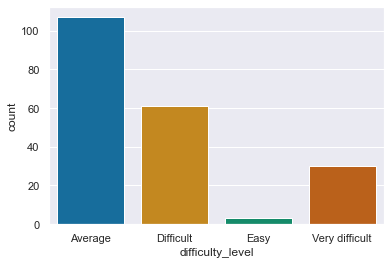

In [19]:
sns.countplot(x = "difficulty_level", data = room_data)

## Fear level

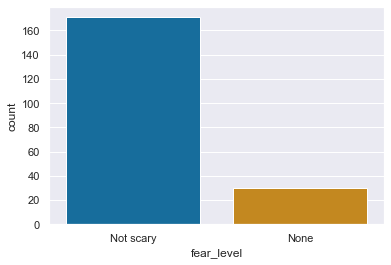

In [20]:
sns.countplot(x = "fear_level", data = room_data)

## Age requirement

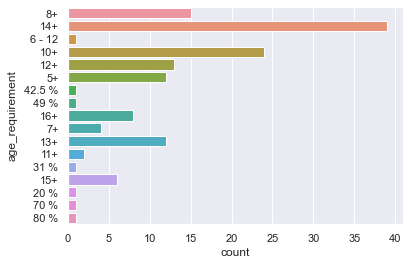

In [22]:
sns.countplot(y = "age_requirement", data = room_data)

## Time limit

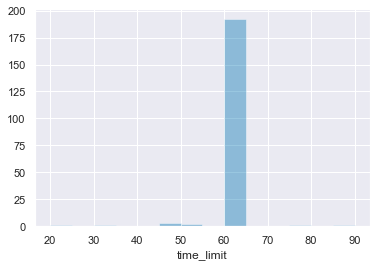

In [26]:
sns.distplot(room_data["time_limit"], kde = False)

## Player range

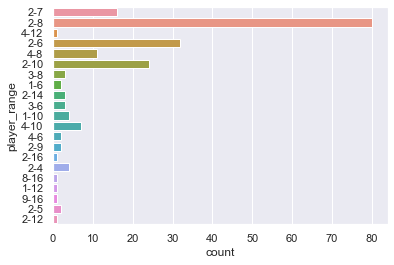

In [29]:
sns.countplot(y = "player_range", data = room_data)

## Tags

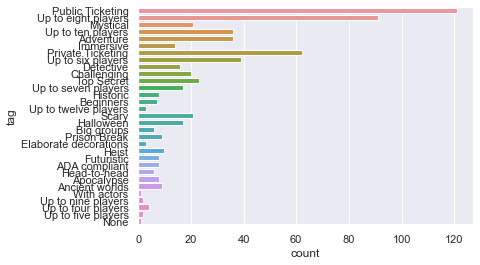

In [30]:
sns.countplot(y = "tag", data = tag_data)

In [52]:
tag_data["tag"].unique()

array(['Public Ticketing', 'Up to eight players', 'Mystical',
       'Up to ten players', 'Adventure', 'Immersive', 'Private Ticketing',
       'Up to six players', 'Detective', 'Challenging', 'Top Secret',
       'Up to seven players', 'Historic', 'Beginners',
       'Up to twelve players', 'Scary', 'Halloween', 'Big groups',
       'Prison Break', 'Elaborate decorations', 'Heist', 'Futuristic',
       'ADA compliant', 'Head-to-head', 'Apocalypse', 'Ancient worlds',
       'With actors', 'Up to nine players', 'Up to four players',
       'Up to five players', 'None'], dtype=object)

In [45]:
def recode_difficulty(x):
    if x == "Easy":
        return 0
    elif x == "Average":
        return 1
    elif x == "Difficult":
        return 2
    elif x == "Very difficult":
        return 3
    else:
        return "None"

In [49]:
def recode_fear(x):
    if x == "Not scary":
        return 0
    elif x == "Scary":
        return 1
    elif x == "Very scary":
        return 2
    else:
        return "None"

In [50]:
room_data.assign(min_players = room_data["player_range"].apply(lambda x: x[:1]),
                 max_players = room_data["player_range"].apply(lambda x: x[-1:]),
                 min_age = room_data["age_requirement"].apply(lambda x: str(x).strip("+")),
                 difficulty_int = room_data["difficulty_level"].apply(lambda x: recode_difficulty(x)),
                 fear_int = room_data["fear_level"].apply(lambda x: recode_fear(x)))

,room_title,woe_room_url,room_address,room_description,player_range,time_limit,difficulty_level,fear_level,age_requirement,success_rate,min_players,max_players,min_age,difficulty_int,fear_int
0,"Escape room ""The Executioner"" by Huntsville Es...",https://worldofescapes.com/huntsville/quests/h...,"604 Madison St SE Huntsville, AL 35801","Long ago, in medieval times, fear has permeate...",2-7,60,Average,Not scary,8+,None,2,7,8,1,0
1,"Escape room ""The Submarine"" by Escape The Room...",https://worldofescapes.com/phoenix/quests/esca...,"7017 E Main St Scottsdale, AZ 85251",Get ready to explore the deep like many brave ...,2-8,60,Average,Not scary,14+,None,2,8,14,1,0
2,"Escape room ""The Box"" by Escape Enterprise in ...",https://worldofescapes.com/daleville/quests/es...,"1018 Rucker Blvd Suite A/B Enterprise, AL 36330",You and a group of operatives have been tasked...,2-8,60,Average,Not scary,NaN,None,2,8,nan,1,0
3,"Escape room ""Submarine Survival"" by Breakout G...",https://worldofescapes.com/birm/quests/breakou...,"2717 19th Pl S Homewood, AL 35209","Welcome aboard the USS Odyssey, a submarine se...",2-7,60,Difficult,Not scary,NaN,None,2,7,nan,2,0
4,"Escape room ""The Shed"" by Dare To Escape AZ in...",https://worldofescapes.com/phoenix/quests/dare...,"9875 S Priest Dr #101 Tempe, AZ 85284",You met with your friends for a late night sho...,4-12,60,Average,Not scary,NaN,None,4,2,nan,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,"Escape room ""Murder at the Mansion"" by Escape ...",https://worldofescapes.com/dothan/quests/escap...,"3759 Ross Clark Cir Dothan, AL 36303",You have entered the study of a wealthy busine...,2-8,60,Average,Not scary,10+,None,2,8,10,1,0
197,"Escape room ""Hostage"" by Breakout Games - Mobi...",https://worldofescapes.com/mobile/quests/break...,"3090 Dauphin Square Conn Mobile, AL 36607",You wake up handcuffed and trapped in a small ...,2-8,60,Difficult,Not scary,NaN,None,2,8,nan,2,0
198,"Escape room ""The 13th Floor"" by Escape Dothan ...",https://worldofescapes.com/dothan/quests/escap...,"3759 Ross Clark Cir Dothan, AL 36303",You immediately got that eerie feeling when th...,2-6,60,Average,Not scary,10+,0.4,2,6,10,1,0
199,"Escape room ""The Fortune Teller"" by Epic Escap...",https://worldofescapes.com/phoenix/quests/Epic...,"106 N. Central Avenue, Phoenix, AZ 85004",Madame Zarra has been doing psychic readings f...,2-8,60,Difficult,Not scary,15+,0.25,2,8,15,2,0


In [34]:
int("2-7"[-2:])

-7